<a href="https://colab.research.google.com/github/nxxk23/bsc_dpdm22/blob/main/Quiz_Group_5_20_of_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลของกรม อุตุ() ให้อยู่ในรูปแบบ ตารางด้านล่าง เพื่อเตรียมข้อมูลสำหรับสร้าง Model ทำนาย อุณหภูมิต่ำสุดของวันจากค่าอื่นๆ

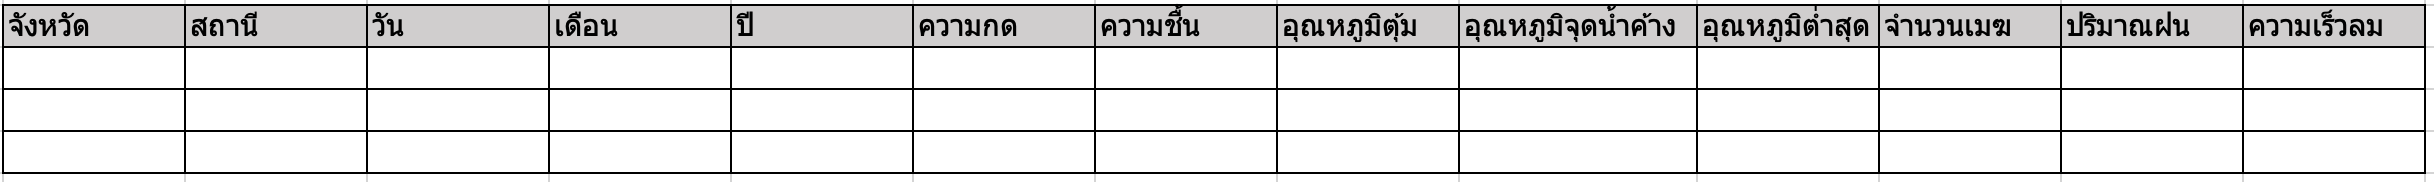

column เดือน-ปี สามารถยุบรวมเป็น 1 column ได้

In [1]:
#เชื่อม google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#pressure

In [2]:
import pandas as pd
p1 = pd.read_excel('/content/drive/MyDrive/DPDM/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
p2 = pd.read_excel('/content/drive/MyDrive/DPDM/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
p3 = pd.read_excel('/content/drive/MyDrive/DPDM/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
p4 = pd.read_excel('/content/drive/MyDrive/DPDM/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
p5 = pd.read_excel('/content/drive/MyDrive/DPDM/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)

In [3]:
#p1['เดือน'] = pd.to_datetime(p1['เดือน/ปี']).dt.strftime('%m')
#p1['ปี'] = pd.to_datetime(p1['เดือน/ปี']).dt.strftime('%Y')

In [4]:
p1.columns

Index(['ที่', 'สถานี', 'เดือน/ปี', 'วันที่', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'เฉลี่ย'],
      dtype='object')

In [5]:
p1.rename(columns = {'วันที่':'1', 'Unnamed: 4':'2', 'Unnamed: 5':'3',
       'Unnamed: 6':'4', 'Unnamed: 7':'5', 'Unnamed: 8':'6', 'Unnamed: 9':'7', 'Unnamed: 10':'8',
       'Unnamed: 11':'9', 'Unnamed: 12':'10', 'Unnamed: 13':'11', 'Unnamed: 14':'12',
       'Unnamed: 15':'13', 'Unnamed: 16':'14', 'Unnamed: 17':'15', 'Unnamed: 18':'16',
       'Unnamed: 19':'17', 'Unnamed: 20':'18', 'Unnamed: 21':'19', 'Unnamed: 22':'20',
       'Unnamed: 23':'21', 'Unnamed: 24':'22', 'Unnamed: 25':'23', 'Unnamed: 26':'24',
       'Unnamed: 27':'25', 'Unnamed: 28':'26', 'Unnamed: 29':'27', 'Unnamed: 30':'28',
       'Unnamed: 31':'29', 'Unnamed: 32':'30', 'Unnamed: 33':'31'}, inplace = True)

In [6]:
import numpy as np

In [7]:
p1.transpose().iteritems #ตรงนี้ใช้ดูค่าของแต่ละอันได้อยู่ ได้อยู่=

<bound method DataFrame.iteritems of                                 1                         2   \
ที่                            1                         2     
สถานี     352201-หนองคาย จ.หนองคาย  352201-หนองคาย จ.หนองคาย   
เดือน/ปี       2011-10-01 00:00:00       2011-11-01 00:00:00   
1                          1005.47                   1011.79   
2                          1006.65                   1010.83   
3                          1007.49                   1010.74   
4                          1008.28                   1010.71   
5                          1009.88                   1010.09   
6                          1011.36                   1009.24   
7                          1011.17                   1008.03   
8                           1010.2                    1007.2   
9                          1010.14                   1009.68   
10                          1010.6                   1011.96   
11                         1010.04                   1012.75   
12 

In [8]:
p1['เดือน/ปี'].dt.strftime('%m-%Y').transpose().iteritems

<bound method Series.iteritems of 1     10-2011
2     11-2011
3     12-2011
4     01-2012
5     02-2012
6     10-2012
7     11-2012
8     12-2012
9     01-2013
10    02-2013
11    10-2013
12    11-2013
13    12-2013
14    01-2014
15    02-2014
16    10-2014
17    11-2014
18    12-2014
19    01-2015
20    02-2015
21    10-2015
22    11-2015
23    12-2015
24    01-2016
25    02-2016
26    10-2016
27    11-2016
28    12-2016
29    01-2017
30    02-2017
31    10-2017
32    11-2017
33    12-2017
34    01-2018
35    02-2018
36    10-2018
37    11-2018
38    12-2018
39    01-2019
40    02-2019
41    10-2019
42    11-2019
43    12-2019
44    01-2020
45    02-2020
46    10-2020
47    11-2020
48    12-2020
49    01-2021
50    02-2021
51    10-2021
52    11-2021
53    12-2021
54    01-2022
55    02-2022
Name: เดือน/ปี, dtype: object>

In [9]:
p1.columns

Index(['ที่', 'สถานี', 'เดือน/ปี', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', 'เฉลี่ย'],
      dtype='object')

In [10]:
#p = p1[['เดือน/ปี', '1', '2', '3', '4', '5', '6', '7', '8', '9','10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21','22', '23', '24', '25', '26', '27', '28', '29', '30', '31']]

In [11]:
#p1['เดือน-ปี'] = pd.to_datetime(p1['เดือน/ปี']).dt.strftime('%m-%Y')

In [12]:
for name, values in p1.transpose().iteritems():
   print('{name} -> {value} '.format(name=name, value=values)) 

1 -> ที่                              1  
สถานี       352201-หนองคาย จ.หนองคาย
เดือน/ปี         2011-10-01 00:00:00
1                            1005.47
2                            1006.65
3                            1007.49
4                            1008.28
5                            1009.88
6                            1011.36
7                            1011.17
8                             1010.2
9                            1010.14
10                            1010.6
11                           1010.04
12                           1009.07
13                           1008.45
14                           1008.02
15                            1009.2
16                           1010.38
17                           1013.06
18                           1013.54
19                           1011.43
20                           1011.36
21                           1011.34
22                            1010.9
23                           1010.76
24                           1010

##commit 2

Idea : ลองทำให้มันได้สัก1ตารางก่อน แล้วค่อยใช้ลูปนั้นไปทำทั้งหมด ไม่ได้เกี่ยวกะ merge table ปะ หรือเกี่ยวอะ

In [13]:
p1['เดือน/ปี'] = pd.to_datetime(p1['เดือน/ปี']).dt.strftime('%m-%Y') #change format month and year from **-mm-yyy to mm-yyyy

In [14]:
#select columns
p = p1[['เดือน/ปี', '1', '2', '3', '4', '5', '6', '7', '8', '9','10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21','22', '23', '24', '25', '26', '27', '28', '29', '30', '31']]

- เป็นค่าความกดของวันที่ 1-31 เดือน 10 ปี 2011 : rows[1]
- เปลี่ยนค่าไล่ตามแถว values[]

In [15]:
for name, values in p.iteritems():
    print('วันที่ {name} ความกด -> {values}'.format(name=name, values=values[1]))
#for name, values in p1.iteritems():
    #print('วันที่ {name} ความกด -> {values}'.format(name=name, values=values[1]))

วันที่ เดือน/ปี ความกด -> 10-2011
วันที่ 1 ความกด -> 1005.47
วันที่ 2 ความกด -> 1006.65
วันที่ 3 ความกด -> 1007.49
วันที่ 4 ความกด -> 1008.28
วันที่ 5 ความกด -> 1009.88
วันที่ 6 ความกด -> 1011.36
วันที่ 7 ความกด -> 1011.17
วันที่ 8 ความกด -> 1010.2
วันที่ 9 ความกด -> 1010.14
วันที่ 10 ความกด -> 1010.6
วันที่ 11 ความกด -> 1010.04
วันที่ 12 ความกด -> 1009.07
วันที่ 13 ความกด -> 1008.45
วันที่ 14 ความกด -> 1008.02
วันที่ 15 ความกด -> 1009.2
วันที่ 16 ความกด -> 1010.38
วันที่ 17 ความกด -> 1013.06
วันที่ 18 ความกด -> 1013.54
วันที่ 19 ความกด -> 1011.43
วันที่ 20 ความกด -> 1011.36
วันที่ 21 ความกด -> 1011.34
วันที่ 22 ความกด -> 1010.9
วันที่ 23 ความกด -> 1010.76
วันที่ 24 ความกด -> 1010.23
วันที่ 25 ความกด -> 1011.34
วันที่ 26 ความกด -> 1011.84
วันที่ 27 ความกด -> 1011.89
วันที่ 28 ความกด -> 1012.29
วันที่ 29 ความกด -> 1011.67
วันที่ 30 ความกด -> 1011.3
วันที่ 31 ความกด -> 1011.52


In [16]:
p.transpose().iteritems #ตรงนี้ใช้ดูค่าของแต่ละอันได้อยู่ ได้อยู่=มันบ่าได้แม่ 

<bound method DataFrame.iteritems of                1        2        3        4        5        6        7   \
เดือน/ปี  10-2011  11-2011  12-2011  01-2012  02-2012  10-2012  11-2012   
1         1005.47  1011.79  1011.43  1015.67  1013.26   1011.5  1012.67   
2         1006.65  1010.83  1012.57  1014.11  1012.92  1011.11  1011.17   
3         1007.49  1010.74  1012.28  1012.91  1013.61   1008.6  1010.47   
4         1008.28  1010.71  1012.97  1014.06  1013.18  1007.07  1010.24   
5         1009.88  1010.09  1013.09  1015.51  1011.26  1008.17  1010.43   
6         1011.36  1009.24  1012.03  1015.88   1008.8  1010.06   1010.9   
7         1011.17  1008.03  1012.05  1017.72  1008.16  1010.11  1009.76   
8          1010.2   1007.2  1011.94  1018.06  1009.66  1010.07  1008.36   
9         1010.14  1009.68  1014.29  1016.98  1011.25  1010.56  1008.55   
10         1010.6  1011.96   1016.1  1016.18  1011.42  1011.39  1009.21   
11        1010.04  1012.75  1017.69  1016.16  1012.09  1011.03 

In [17]:
p1.head(1)

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
1,1,352201-หนองคาย จ.หนองคาย,10-2011,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645


In [18]:
#p1['เดือน'] = pd.to_datetime(p1['เดือน/ปี']).dt.strftime('%m')
#p1['ปี'] = pd.to_datetime(p1['เดือน/ปี']).dt.strftime('%Y')

In [19]:
p1.iterrows

<bound method DataFrame.iterrows of      ที่                     สถานี เดือน/ปี        1        2        3  \
1    1    352201-หนองคาย จ.หนองคาย  10-2011  1005.47  1006.65  1007.49   
2    2    352201-หนองคาย จ.หนองคาย  11-2011  1011.79  1010.83  1010.74   
3    3    352201-หนองคาย จ.หนองคาย  12-2011  1011.43  1012.57  1012.28   
4    1    352201-หนองคาย จ.หนองคาย  01-2012  1015.67  1014.11  1012.91   
5    2    352201-หนองคาย จ.หนองคาย  02-2012  1013.26  1012.92  1013.61   
6    3    352201-หนองคาย จ.หนองคาย  10-2012  1011.50  1011.11  1008.60   
7    4    352201-หนองคาย จ.หนองคาย  11-2012  1012.67  1011.17  1010.47   
8    5    352201-หนองคาย จ.หนองคาย  12-2012  1009.80  1010.17  1010.74   
9    6    352201-หนองคาย จ.หนองคาย  01-2013  1014.58  1013.30  1013.73   
10   7    352201-หนองคาย จ.หนองคาย  02-2013  1015.19  1013.97  1013.89   
11   8    352201-หนองคาย จ.หนองคาย  10-2013  1007.15  1010.12  1009.88   
12   9    352201-หนองคาย จ.หนองคาย  11-2013  1011.98  1011.46  1012.38   
13

In [20]:
p1.iteritems

<bound method DataFrame.iteritems of      ที่                     สถานี เดือน/ปี        1        2        3  \
1    1    352201-หนองคาย จ.หนองคาย  10-2011  1005.47  1006.65  1007.49   
2    2    352201-หนองคาย จ.หนองคาย  11-2011  1011.79  1010.83  1010.74   
3    3    352201-หนองคาย จ.หนองคาย  12-2011  1011.43  1012.57  1012.28   
4    1    352201-หนองคาย จ.หนองคาย  01-2012  1015.67  1014.11  1012.91   
5    2    352201-หนองคาย จ.หนองคาย  02-2012  1013.26  1012.92  1013.61   
6    3    352201-หนองคาย จ.หนองคาย  10-2012  1011.50  1011.11  1008.60   
7    4    352201-หนองคาย จ.หนองคาย  11-2012  1012.67  1011.17  1010.47   
8    5    352201-หนองคาย จ.หนองคาย  12-2012  1009.80  1010.17  1010.74   
9    6    352201-หนองคาย จ.หนองคาย  01-2013  1014.58  1013.30  1013.73   
10   7    352201-หนองคาย จ.หนองคาย  02-2013  1015.19  1013.97  1013.89   
11   8    352201-หนองคาย จ.หนองคาย  10-2013  1007.15  1010.12  1009.88   
12   9    352201-หนองคาย จ.หนองคาย  11-2013  1011.98  1011.46  1012.38   
1

#moisture

In [21]:
import pandas as pd
m1 = pd.read_excel('/content/drive/MyDrive/DPDM/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
m2 = pd.read_excel('/content/drive/MyDrive/DPDM/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
m3 = pd.read_excel('/content/drive/MyDrive/DPDM/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
m4 = pd.read_excel('/content/drive/MyDrive/DPDM/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
m5 = pd.read_excel('/content/drive/MyDrive/DPDM/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)

In [22]:
m1.head()

,ที่,สถานี,เดือน/ปี,วันที่,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,เฉลี่ย
1,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79.0
2,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68.0
3,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63.0
4,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69.0
5,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65.0


#wind speed

In [23]:
import pandas as pd
w1 = pd.read_excel('/content/drive/MyDrive/DPDM/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
w2 = pd.read_excel('/content/drive/MyDrive/DPDM/ความเร็วลม(นอต)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
w3 = pd.read_excel('/content/drive/MyDrive/DPDM/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
w4 = pd.read_excel('/content/drive/MyDrive/DPDM/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
w5 = pd.read_excel('/content/drive/MyDrive/DPDM/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)

#number of clouds

In [24]:
c1 = pd.read_excel('/content/drive/MyDrive/DPDM/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
c2 = pd.read_excel('/content/drive/MyDrive/DPDM/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
c3 = pd.read_excel('/content/drive/MyDrive/DPDM/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
c4 = pd.read_excel('/content/drive/MyDrive/DPDM/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
c5 = pd.read_excel('/content/drive/MyDrive/DPDM/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)

#amount of rain

In [25]:
r1 = pd.read_excel('/content/drive/MyDrive/DPDM/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
r2 = pd.read_excel('/content/drive/MyDrive/DPDM/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
r3 = pd.read_excel('/content/drive/MyDrive/DPDM/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
r4 = pd.read_excel('/content/drive/MyDrive/DPDM/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
r5 = pd.read_excel('/content/drive/MyDrive/DPDM/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)

#frost point temperature

In [26]:
f1 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
f2 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
f3 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
f4 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
f5 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)

#dry weight temperature

In [27]:
d1 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
d2 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
d3 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
d4 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
d5 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)

#lowest temperature

In [28]:
l1 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
l2 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
l3 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
l4 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)
l5 = pd.read_excel('/content/drive/MyDrive/DPDM/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=3).drop(0, axis=0)

In [29]:
l1.head()

,ที่,สถานี,เดือน/ปี,วันที่,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,เฉลี่ย
1,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
2,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
3,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
4,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
5,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5
